In [74]:
import pandas as pd

#load the dataset (data frame)
df = pd.read_excel("nfl_learning_dataset.xlsx")
df.head()

,player_id,player_name,team,position,games_played,targets,receptions,receiving_yards,receiving_tds,carries,rushing_yards,rushing_tds,air_yards,fantasy_points,route_win_rate,expected_yac,breakout_score,breakout_label
0,1,Player_1,DET,TE,14,52.0,30.0,921.767159,5,0,0.000000,0,368.495788,153.952883,23.480259,5.250908,26.171806,0
1,2,Player_2,CLE,QB,11,0.0,0.0,0.000000,0,0,0.000000,0,0.000000,120.171887,31.562511,4.537940,16.899919,0
2,3,Player_3,DET,RB,12,22.4,17.2,540.398416,3,71,234.456819,3,309.931089,186.989545,61.424282,1.927617,35.070513,1
3,4,Player_4,MIA,QB,9,0.0,0.0,0.000000,0,0,0.000000,0,0.000000,135.156761,52.219511,1.941230,19.577883,0
4,5,Player_5,TB,RB,9,18.8,10.8,206.124543,2,71,337.658247,3,373.786933,86.110067,36.038415,1.613526,23.738321,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_id        350 non-null    int64  
 1   player_name      350 non-null    object 
 2   team             350 non-null    object 
 3   position         350 non-null    object 
 4   games_played     350 non-null    int64  
 5   targets          350 non-null    float64
 6   receptions       350 non-null    float64
 7   receiving_yards  350 non-null    float64
 8   receiving_tds    350 non-null    int64  
 9   carries          350 non-null    int64  
 10  rushing_yards    350 non-null    float64
 11  rushing_tds      350 non-null    int64  
 12  air_yards        350 non-null    float64
 13  fantasy_points   350 non-null    float64
 14  route_win_rate   350 non-null    float64
 15  expected_yac     350 non-null    float64
 16  breakout_score   350 non-null    float64
 17  breakout_label  

In [76]:
df.describe()

,player_id,games_played,targets,receptions,receiving_yards,receiving_tds,carries,rushing_yards,rushing_tds,air_yards,fantasy_points,route_win_rate,expected_yac,breakout_score,breakout_label
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,175.500000,12.057143,32.109143,22.305714,318.953620,3.085714,34.434286,149.495342,1.608571,369.699445,124.476463,42.018012,3.940007,28.516200,0.500000
std,101.180532,2.575428,21.977959,15.374884,216.905535,2.464318,34.942359,173.128797,2.053283,249.073109,48.083256,13.046230,1.428596,8.951762,0.500716
min,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.052349,1.507315,10.797072,0.000000
25%,88.250000,10.000000,17.600000,11.200000,152.517308,1.000000,0.000000,0.000000,0.000000,174.294194,91.981009,30.424715,2.663865,22.135488,0.000000
50%,175.500000,12.000000,38.000000,27.000000,341.672582,3.000000,22.000000,3.842858,0.000000,415.493563,121.734451,42.045305,4.015328,27.504125,0.500000
75%,262.750000,14.000000,51.000000,35.000000,482.808873,5.000000,68.000000,298.452238,3.000000,551.241347,157.108304,53.104107,5.223409,35.400334,1.000000
max,350.000000,16.000000,72.000000,53.000000,921.767159,11.000000,88.000000,635.210631,9.000000,905.295609,269.809885,64.353513,6.495544,52.128942,1.000000


In [77]:
#exploratory data analysis .
df['position'].value_counts()
#tells us how many QBs RBs WRs TEs
#first thing to check, composition of your dataset.


position
TE    98
WR    91
RB    84
QB    77
Name: count, dtype: int64

In [78]:
#average stats by position
df.groupby('position')[['targets','receiving_yards','rushing_yards','fantasy_points']].mean()
#key for modeling 
#shows : WRs get the most targets, RBs get the most carries, QBs get zeroes for these categories, TEs fall in middle

,targets,receiving_yards,rushing_yards,fantasy_points
position,,,,
QB,0.000000,0.000000,0.000000,121.901359
RB,20.038095,414.760785,304.145221,131.136976
TE,51.000000,407.427645,0.000000,125.565600
WR,50.076923,405.120351,294.232651,119.334315


In [79]:
#top 10 WRs by air yards
df[df['position'] == 'WR'].nlargest(10, 'air_yards')[['player_name','team','air_yards','targets']]
#common for data analysis. the 10 parameter means return first 10 records.


,player_name,team,air_yards,targets
282,Player_283,DAL,879.739602,59.0
307,Player_308,NE,829.208709,58.0
237,Player_238,DAL,809.284462,54.0
230,Player_231,NE,755.164669,58.0
80,Player_81,HOU,751.124894,44.0
346,Player_347,LAC,749.786922,61.0
255,Player_256,TB,738.804208,55.0
295,Player_296,TB,738.485065,64.0
273,Player_274,IND,727.651314,60.0
333,Player_334,GB,716.258088,48.0


In [80]:
#top 10 players by fantast points.
df.nlargest(10, 'fantasy_points')[['player_name','team','position','fantasy_points']]
#top preformers

,player_name,team,position,fantasy_points
334,Player_335,SEA,TE,269.809885
284,Player_285,ARI,QB,258.559367
126,Player_127,ARI,QB,246.764521
97,Player_98,TEN,WR,240.129481
227,Player_228,WAS,RB,234.670657
51,Player_52,IND,RB,234.520032
317,Player_318,IND,RB,233.506274
190,Player_191,LV,TE,233.054390
258,Player_259,CHI,WR,229.621400
308,Player_309,LV,TE,228.892265


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8") #cleaner look

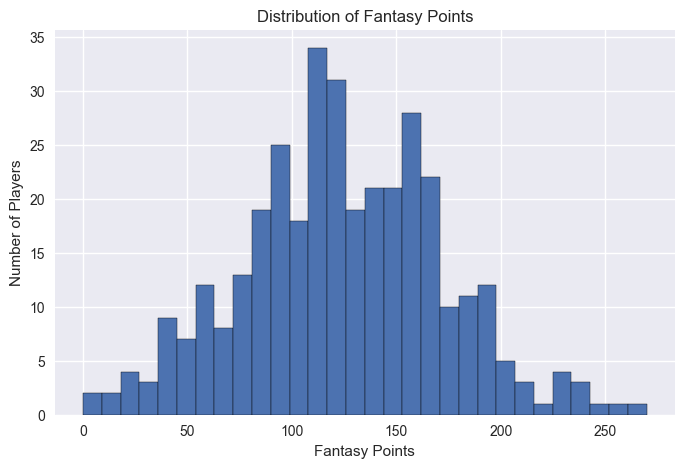

In [82]:
#visualization 1: Fantast Points Distribuition
#this shows how spread out the scores are:
plt.figure(figsize=(8,5))
plt.hist(df['fantasy_points'], bins=30, edgecolor='black')
plt.title("Distribution of Fantasy Points")
plt.xlabel("Fantasy Points")
plt.ylabel("Number of Players")
plt.show()

# are most players low scoreres? 
# are there few elite outliers
# is the distribution skewed?

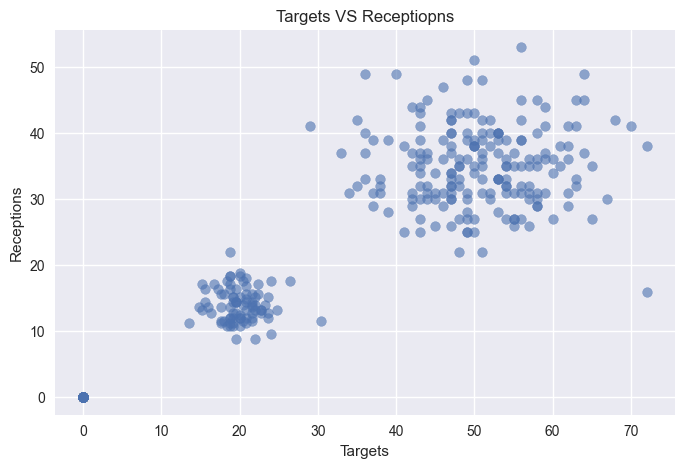

In [83]:
#targets vs receptions : shows efficiency. 
plt.figure(figsize=(8,5))
plt.scatter(df['targets'], df['receptions'], alpha=0.6)
plt.title("Targets VS Receptiopns")
plt.xlabel("Targets")
plt.ylabel("Receptions")
plt.show()

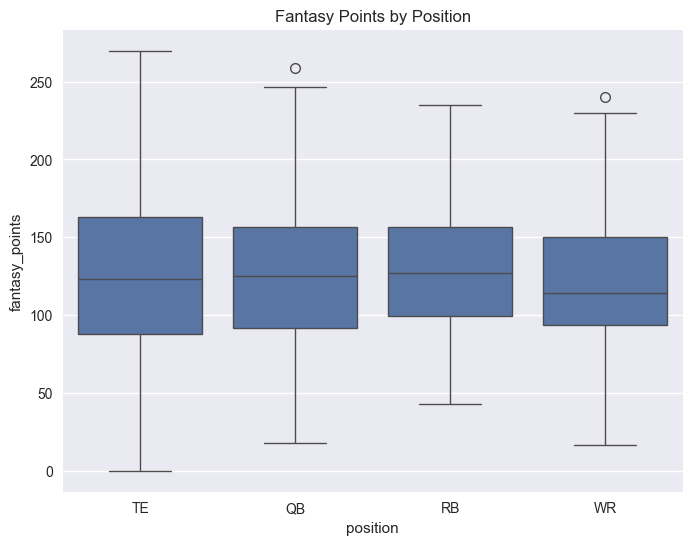

In [84]:
#Fantasy Points by Position
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='position', y='fantasy_points')
plt.title("Fantasy Points by Position")
plt.show()


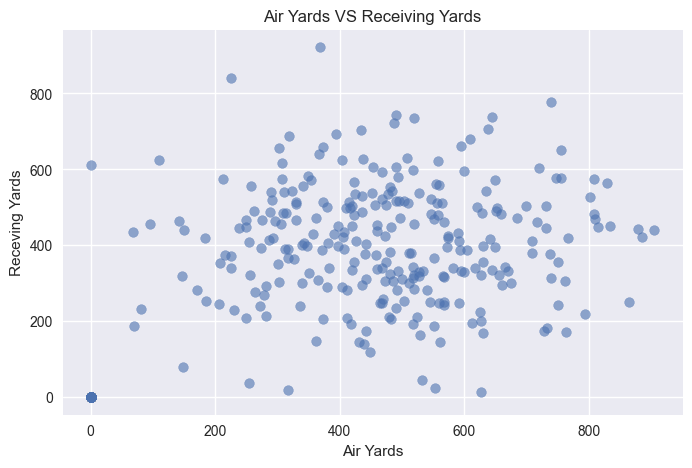

In [85]:
#visualization #4 , air yards vs receiving yards.
plt.figure(figsize=(8,5))
plt.scatter(df['air_yards'], df['receiving_yards'], alpha=0.6)
plt.title("Air Yards VS Receiving Yards")
plt.xlabel("Air Yards")
plt.ylabel("Receving Yards")
plt.show()

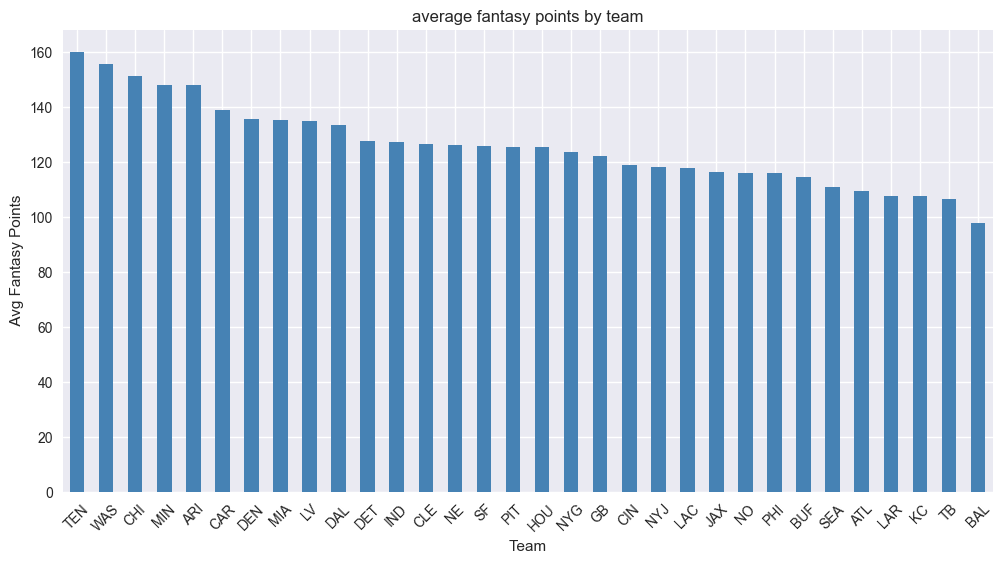

In [86]:
#average fantasy points by team:
#tells us which offens generate the most total production
#which teams are inefficient/low volume
#where player breakout potential may be higher
#best environments for fantasty football.

team_fp = df.groupby('team')['fantasy_points'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
team_fp.plot(kind='bar',color='steelblue')
plt.title("average fantasy points by team")
plt.ylabel(" Avg Fantasy Points")
plt.xlabel(" Team ")
plt.xticks(rotation=45)
plt.show()

In [87]:
# new data set // introducing heat maps (numberical data only) //
import pandas as pd

#load the dataset (data frame)
df = pd.read_excel("nfl_learning_dataset_v2.xlsx")
df.head()

,player_id,player_name,team,position,games_played,targets,receptions,receiving_yards,receiving_tds,carries,...,air_yards,fantasy_points,route_win_rate,expected_yac,breakout_score,breakout_label,catch_rate,yards_per_target,td_efficiency,rushing_efficiency
0,1,Player_1,DET,TE,14,52.0,30.0,921.767159,5,0,...,368.495788,153.952883,23.480259,5.250908,26.171806,0,0.576923,17.726292,0.096154,NaN
1,2,Player_2,CLE,QB,11,0.0,0.0,0.000000,0,0,...,0.000000,120.171887,31.562511,4.537940,16.899919,0,NaN,NaN,NaN,NaN
2,3,Player_3,DET,RB,12,22.4,17.2,540.398416,3,71,...,309.931089,186.989545,61.424282,1.927617,35.070513,1,0.767857,24.124929,0.133929,3.302209
3,4,Player_4,MIA,QB,9,0.0,0.0,0.000000,0,0,...,0.000000,135.156761,52.219511,1.941230,19.577883,0,NaN,NaN,NaN,NaN
4,5,Player_5,TB,RB,9,18.8,10.8,206.124543,2,71,...,373.786933,86.110067,36.038415,1.613526,23.738321,0,0.574468,10.964071,0.106383,4.755750


In [88]:
# select only numeric values in pandas 
numeric_df = df.select_dtypes(include='number')
numeric_df.head()

,player_id,games_played,targets,receptions,receiving_yards,receiving_tds,carries,rushing_yards,rushing_tds,air_yards,fantasy_points,route_win_rate,expected_yac,breakout_score,breakout_label,catch_rate,yards_per_target,td_efficiency,rushing_efficiency
0,1,14,52.0,30.0,921.767159,5,0,0.000000,0,368.495788,153.952883,23.480259,5.250908,26.171806,0,0.576923,17.726292,0.096154,NaN
1,2,11,0.0,0.0,0.000000,0,0,0.000000,0,0.000000,120.171887,31.562511,4.537940,16.899919,0,NaN,NaN,NaN,NaN
2,3,12,22.4,17.2,540.398416,3,71,234.456819,3,309.931089,186.989545,61.424282,1.927617,35.070513,1,0.767857,24.124929,0.133929,3.302209
3,4,9,0.0,0.0,0.000000,0,0,0.000000,0,0.000000,135.156761,52.219511,1.941230,19.577883,0,NaN,NaN,NaN,NaN
4,5,9,18.8,10.8,206.124543,2,71,337.658247,3,373.786933,86.110067,36.038415,1.613526,23.738321,0,0.574468,10.964071,0.106383,4.755750


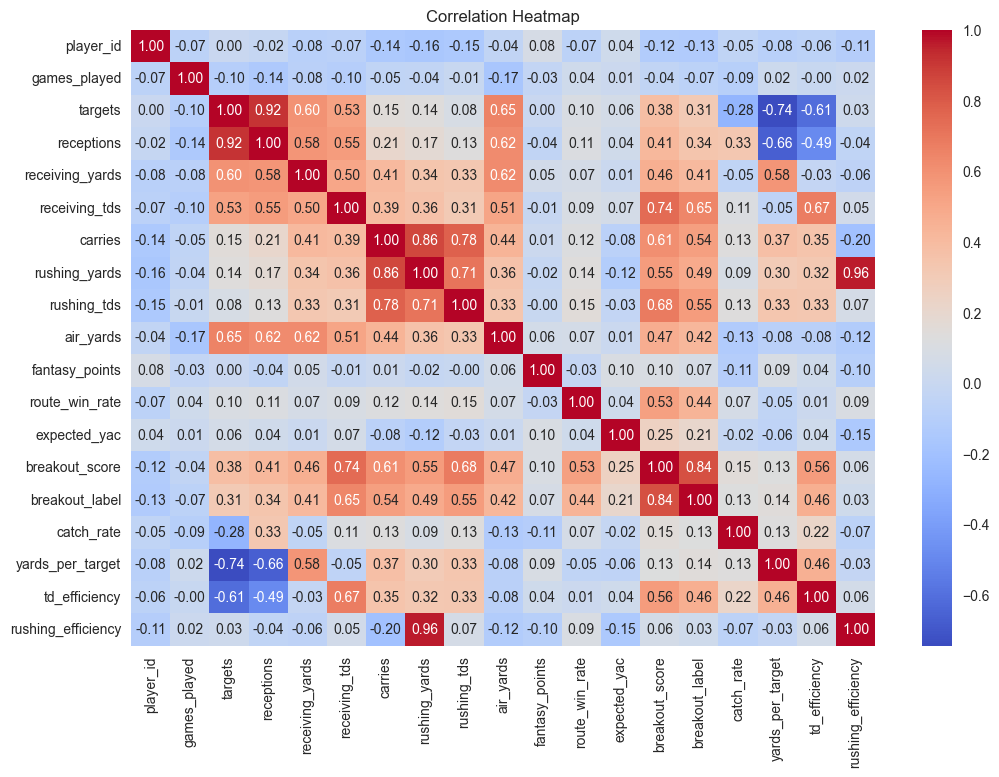

In [89]:
#creating correlation heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt


# dataframe for heatmap
#.corr returns a matrix table of values between -1 and 1
# (correlation)
# +1.0 -> perfect positive correlation
# -1.0 -> perfect negative correlation
#    0 -> no correlation

corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [90]:
#feature selection ( what features to keep / remove / transform / which help a predictive model.)

#identify redundant features (yards and carries, receptions and reception yards, since they're similar not needed twice.)
#idenfity useful low correlation features
#identify "target-leaking" features
#identify categorical features (team/position (non numerical features))



#create the "feature matrix (x) and the Label/Target what you want to predict (y)" 

# #define y = what you want the model to predict (breakout_label) (output) x = all other usefel, clean, features (input) 

# target = breakout 0 / 1

#drop non numerical + redundant columns
dfdrop = df.drop(columns=["player_id", "player_name","team","position","receptions","carries"])

#create x and y
x = dfdrop.drop(columns=["breakout_label"])
y = dfdrop["breakout_label"]


#fill all na with zero to clean the database? IMPORTANT: logistic regression cannot handle NaNs
x = x.fillna(0)



#train / test split
#train model on 80% of the data
#test the model on 20% of the data it has NEVER seen  -->  test_size = 0.2
#this shows how well the model generalizes.
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [91]:
# SCALE =====================================================
from sklearn.preprocessing import StandardScaler


#scale our x, makes all features exist on the same scale, so no one feature dominates the model. 
#optimization algorithms converge correctly.
#model learns fairly from all features.

#witout scaling , accuracy drops.

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [92]:
#Training logistic regression model
    #build the model, train data on it, test how well it works, evaluate precision, accuraccy

from sklearn.linear_model import LogisticRegression

#while working , i initially forgot to clean the database. so we will remove all missing values. x = x.fillna(0)


model = LogisticRegression(max_iter=2000)  #max_iter=2000 gives the model enough iterations to find the best solution. important when scaling. (max iterations)
model.fit(x_train_scaled, y_train) # tells model to learn the patterns in x to map to y.
#this trains the model. trained classifier.


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [93]:
#generate predictions to run on the test set. 
y_pred = model.predict(x_test_scaled)
    #tells model to use what you learned to predict the labels of the test data.

In [94]:
#evaluate model efficiency
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.92      0.94      0.93        35

    accuracy                           0.93        70
   macro avg       0.93      0.93      0.93        70
weighted avg       0.93      0.93      0.93        70

[[32  3]
 [ 2 33]]
